# Análise de dados do Tweeter relacionados ao COVID-19

### Bibliotecas utilizadas

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud, STOPWORDS

## Primeiro arquivo - data 27/01/2021

### Lê o arquivo gerado

In [2]:
tweets_df = pd.read_csv("./Dados/tweets_covid.csv")
tweets_df.head(5)

,Unnamed: 0,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Place
0,0,"Na grande mídia brasileira, a destruição da de...",124,1346926091693387778,kmendoncafilho,Kleber Mendonça Filho,"Recife, Brazil",NaN,2021-01-06 21:06:19,Twitter for iPhone,26032,4322,NaN
1,1,a pandemia me fez deixar de gostar de muitas p...,86,1346829603109818376,louieponto,louie ponto,"florianópolis, sc",NaN,2021-01-06 14:42:54,Twitter for iPhone,23808,6171,NaN
2,2,"Nas eleições,148 milhões de eleitores tiveram ...",274,1346799310172803077,ArthurLira_,Arthur Lira,"Maceió, Brasil",NaN,2021-01-06 12:42:32,Twitter for iPhone,27534,5529,NaN
3,3,O coronavirus se despedindo #vemvacina https:/...,62,1347336196289155072,visooya,the vivi ♩,Brasil,NaN,2021-01-08 00:15:56,Twitter for Android,0,480,NaN
4,4,Meu top 3 ódios 1 Bolsonaro 2 Corona 3 Energisa,47,1347336194699493377,taina_primo,Tainassss,"Estiva, Brasil",NaN,2021-01-08 00:15:55,Twitter for Android,0,2,NaN


### Identifica o tweet com o maior número de likes

In [3]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
Nas eleições,148 milhões de eleitores tiveram a obrigação de ir às urnas e votar em plena pandemia. Agora,o presidente da Câmara @rodrigomaia e seu candidato @baleiarossi querem votar remotamente na eleição p/presidência da Câmara. Qual a verdadeira intenção por trás disso?
Número de curtidas: 27534


### Verifica se existem mais tweets 'empatados' com o mesmo número de likes

In [4]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta quantos tweets possuem o mesmo valor máximo de curtidas

1


### Identifica o retweet com o maior número de likes

In [5]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
ñ vejo a hora de falar  “na época do corona”
Número de retweets: 36671


### Verifica se existem mais retweets 'empatados' com o mesmo número de likes

In [6]:
print(np.sum(tweets_df['Retweets'] == retweet_max)) #conta quantos tweets possuem o mesmo valor máximo de Retweets

1


### Neste passo vamos montar uma nuvem de palavras utilizando os tweets

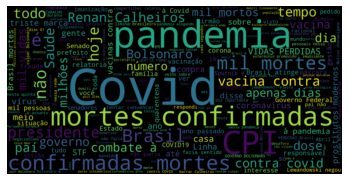

In [18]:
stopwords = set(STOPWORDS)

new_words = []
with open("./Dados/stopwords.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='black', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('./Imagens/covid_cloud_1.png', dpi=300)
plt.show()

## Segundo arquivo - data 30/04/2021

### Lê o arquivo gerado

In [8]:
tweets_df = pd.read_csv("./Dados/tweets_covid_2.csv")
tweets_df.head(5)

,Unnamed: 0,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets
0,0,Ninguém do showbusiness brasileiro fez mais pe...,274,1387918507904540674,DaniloGentili,Danilo Gentili,Santo André,NaN,2021-04-29 23:55:33,Twitter for iPhone,28283,3325
1,1,400 mil mortes por COVID registradas. Mais de ...,277,1387861253490626564,oatila,Atila Iamarino,São Paulo,NaN,2021-04-29 20:08:02,Twitter Web App,25472,3004
2,2,Governo brasileiro foi duramente criticado no ...,110,1388071961427906563,andretrig,André Trigueiro,"Rio de Janeiro, Brasil",NaN,2021-04-30 10:05:19,Twitter for iPhone,9965,2255
3,3,Mortes e internações por Covid-19 têm tendênci...,100,1388167767799570434,arimateasouza,Arimatéa Souza,NaN,NaN,2021-04-30 16:26:01,Twitter Web App,0,0
4,4,"""Máscara no queixo"", falou a foca saltitante q...",125,1388167766218313731,tibrar,Tiago,"porto ferreira-sp, Brasil",NaN,2021-04-30 16:26:01,Twitter for Android,0,564


### Identifica o tweet com o maior número de likes

In [9]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
Ninguém do showbusiness brasileiro fez mais pelas pessoas na Pandemia do que os Sertanejos. Foram muitas lives beneficentes e doações grandiosas para necessitados e hospitais.   Mas bom mesmo é o Felipe Neto lambendo bota de ex presidiário pra ganhar biscoito de militância.
Número de curtidas: 28283


### Verifica se existem mais tweets 'empatados' com o mesmo número de likes

In [11]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta quantos tweets possuem o mesmo valor máximo de curtidas

1


### Identifica o retweet com o maior número de likes

In [12]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
‘quando a pandemia acabar’  otimista da sua parte
Número de retweets: 18385


### Verifica se existem mais retweets 'empatados' com o mesmo número de likes

In [13]:
print(np.sum(tweets_df['Retweets'] == retweet_max)) #conta quantos tweets possuem o mesmo valor máximo de Retweets

2


### Neste caso, existem 2, então vamos olhar qual é o segundo

In [14]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[1] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
‘quando a pandemia acabar’  otimista da sua parte
Número de retweets: 18385


#### Podemos ignorar, parece que foi duplicado

### Neste passo vamos montar uma nuvem de palavras utilizando os tweets

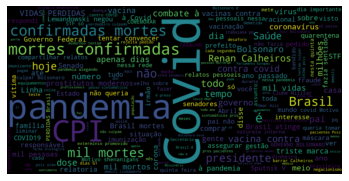

In [16]:
stopwords = set(STOPWORDS)

new_words = []
with open("./Dados/stopwords.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='black', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('./Imagens/covid_cloud_2.png', dpi=300)
plt.show()